In [21]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
import pyttsx3
from googletrans import Translator


In [12]:
im = ("text.jpg")
# plt.imshow(im)


In [22]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'], gpu = False)
    return reader.readtext(img_path)

In [14]:
# result = recognize_text("text.jpg")
# print(result)

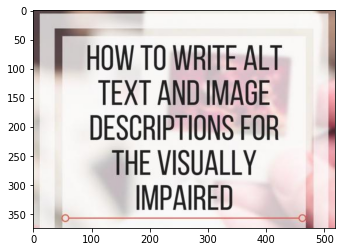

In [15]:
img_1 = cv2.imread("text.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [41]:
def overlay_ocr_text(img_path):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 10
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
            sentence = ''
            for (bbox, text, prob) in result:
                sentence += f'{text} '

    print(sentence)
    f = open("demofile3.txt", "a")
    f.write(sentence)
    f.write("\n\n")
    f.close()
    # show and save image
    axarr[1].imshow(img)
    plt.show()

Using CPU. Note: This module is much faster with a GPU.


Detected text: HOW TO WRITE AlT (Probability: 0.79)
Detected text: TEXT AND IMAGE (Probability: 0.94)
Detected text: DESCRIPTIONS FOR (Probability: 0.98)
Detected text: THE VISUALLY (Probability: 0.86)
Detected text: IMPAIRED (Probability: 0.80)
HOW TO WRITE AlT TEXT AND IMAGE DESCRIPTIONS FOR THE VISUALLY IMPAIRED 


<Figure size 432x288 with 0 Axes>

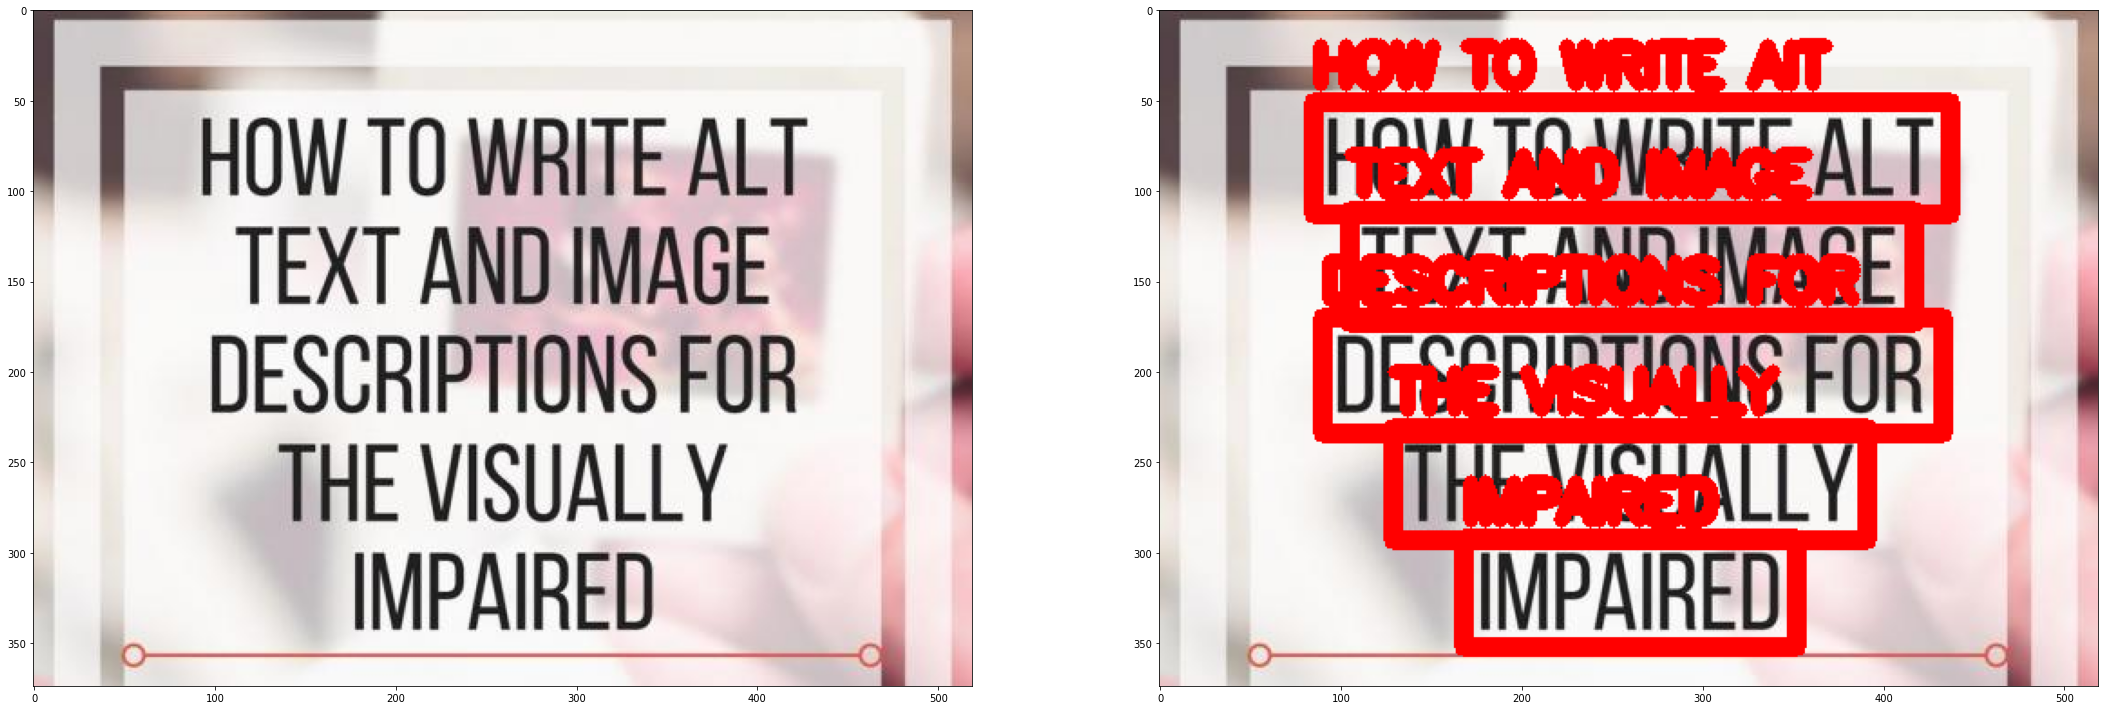

In [34]:
overlay_ocr_text("text.jpg")

In [42]:
result = recognize_text("text.jpg")

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
    
# print(sentence)
# f = open("demofile3.txt", "a")
# f.write(sentence)
# f.write("\n\n")
# f.close()

Using CPU. Note: This module is much faster with a GPU.


In [43]:
def reading_text_en(text): 
    engine = pyttsx3.init()
    engine.setProperty('rate', 100)
    engine.say(text)
    engine.runAndWait()


In [44]:
from os import listdir
import time
#cyclic over folder with time

def folder_reading(folder_path):
    sum_ = 0
    count = 0
    for filename in listdir(folder_path):
        start_time = time.time()
        im_path = folder_path + filename
        recognize_text(im_path)
        overlay_ocr_text(im_path)
        end_time = time.time()
        exec_time = end_time - start_time
        sum_ += exec_time 
        count += 1
        print(im_path, 'execution accured during ', exec_time ,' seconds')
    avg = sum_/count
    print('avarage execution time is :', avg)

Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.


Detected text: HOW TO WRITE AlT (Probability: 0.79)
Detected text: TEXT AND IMAGE (Probability: 0.94)
Detected text: DESCRIPTIONS FOR (Probability: 0.98)
Detected text: THE VISUALLY (Probability: 0.86)
Detected text: IMPAIRED (Probability: 0.80)
HOW TO WRITE AlT TEXT AND IMAGE DESCRIPTIONS FOR THE VISUALLY IMPAIRED 


<Figure size 432x288 with 0 Axes>

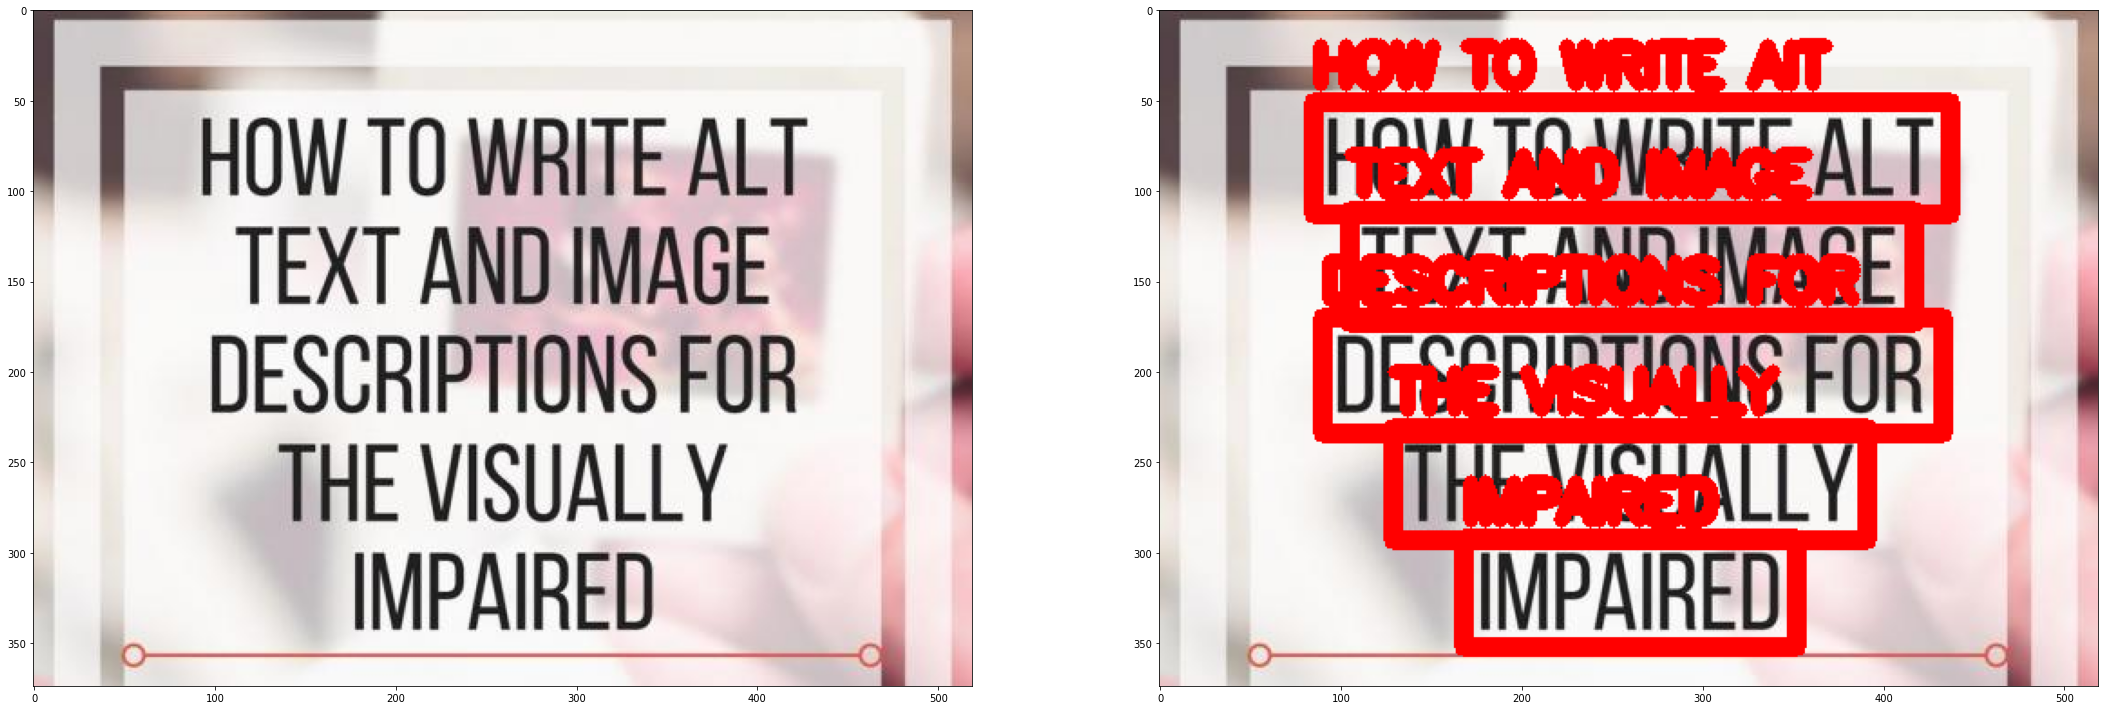

Using CPU. Note: This module is much faster with a GPU.


text/text.jpg execution accured during  12.130720615386963  seconds


Using CPU. Note: This module is much faster with a GPU.


Detected text: Every (Probability: 1.00)
Detected text: is (Probability: 0.72)
Detected text: the right path: (Probability: 0.63)
Detected text: path (Probability: 0.99)
Every is the right path: path 


<Figure size 432x288 with 0 Axes>

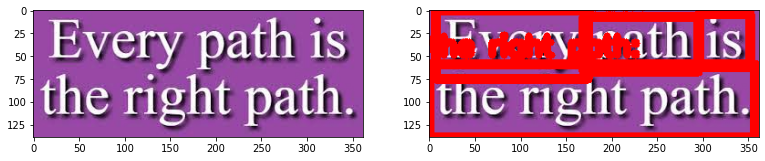

Using CPU. Note: This module is much faster with a GPU.


text/text2.jfif execution accured during  11.750229835510254  seconds


Using CPU. Note: This module is much faster with a GPU.


Detected text: This is the first line of (Probability: 0.76)
Detected text: this text example. (Probability: 0.65)
Detected text: This is the second line (Probability: 0.78)
Detected text: of the same text. (Probability: 0.71)
This is the first line of this text example. This is the second line of the same text. 


<Figure size 432x288 with 0 Axes>

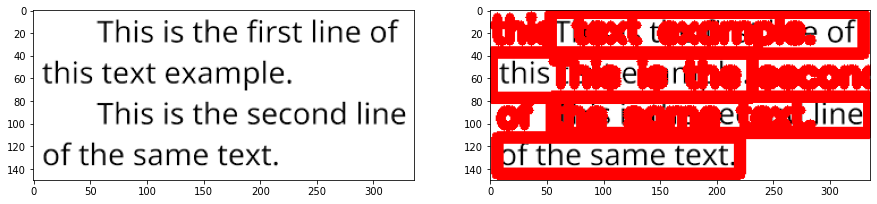

text/text3.png execution accured during  14.95089864730835  seconds
avarage execution time is : 12.943949699401855


In [45]:
folder_reading("text/")

In [48]:
# TRANSLATINg

def translating(path):
    translater = Translator()
    lines=[]
    with open(path) as f:
        lines = f.readlines()

    for line in lines:
        reading_text_en(line)
        f = open("translated.txt", "a", encoding="utf-8")
        out = translater.translate(line , dest = 'ru')
        print(out.text)
        f.write(out.text)
        f.write("\n")
        f.close()



In [49]:
 translating('demofile3.txt')

Это первая строка этого текстового примера. Это вторая строка того же текста.

КАК СОСТАВЛЯТЬ АЛЬТЕРНАТИВНЫЙ ТЕКСТ И ОПИСАНИЯ ИЗОБРАЖЕНИЙ ДЛЯ ЛЮДЕЙ С НАРУШЕННЫМ ЗРЕНИЕМ

Каждый правильный путь: путь

Это первая строка этого текстового примера. Это вторая строка того же текста.

